# Exploratory data analysis (EDA)

## Haberman Dataset

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute)
   * 1 = the patient survived 5 years or longer 
   * 2 = the patient died within 5 year


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

'''downlaod hebarman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set'''
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [2]:
print(haberman.shape)

(305, 4)


** As there is no column names as part of data so assign column names for it manually **

In [3]:
haberman.columns = ["Age", "Operation_Year", "Axillary_Nodes", "Survival_Status"]
haberman.columns

Index(['Age', 'Operation_Year', 'Axillary_Nodes', 'Survival_Status'], dtype='object')

In [4]:
haberman.head()

,Age,Operation_Year,Axillary_Nodes,Survival_Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
# total number of classifications for predictor 
haberman["Survival_Status"].value_counts()

1    224
2     81
Name: Survival_Status, dtype: int64

In [7]:
#Checking datatypes of Feature
haberman.dtypes

Age                int64
Operation_Year     int64
Axillary_Nodes     int64
Survival_Status    int64
dtype: object

In [8]:
# Check is there any null values
haberman.isnull().values.any()

False

#### Observation(s) :

* We have total 305 data points.
* Dataset has 4 columns including class variable and all are of type Numerical
* 3 are feature/Independent Variables (Age, Year of operation, axillary nodes)
* Survival status is the class variable/Predictor/Dependent Variable
* Dataset appear to be completely populate as there is no null value.
* Out of 305 there are 224 data elements as Survival status 1 and 81 data elements as Survival status 2
* So this imabalanced data set (since data element count for class variable is not same for all classifications)



## Bi-variate Analysis 
    
   - Bivariate analysis is the simultaneous analysis of two variables (attributes).
   - It explores the concept of relationship between two variables, whether there exists an association 
      and the strength of this association.
   - The best example of Bi-variate is- Pair plots and Scatter plots.

### 2-D Scatter Plot

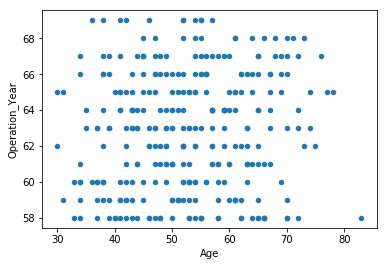

In [9]:
# Scatter plot for Age against Year of operation
haberman.plot(kind='scatter', x='Age', y='Operation_Year') ;
plt.show()

# It is very hard to make any sense out these points.
# let's assign color code to data points belonginig to respective feature.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


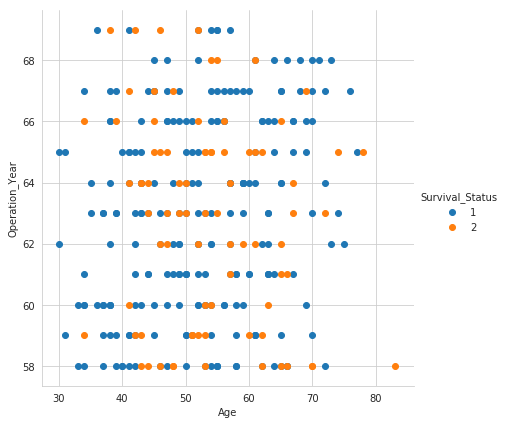

In [10]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=6) \
   .map(plt.scatter, "Age", "Operation_Year") \
   .add_legend();
plt.show();



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


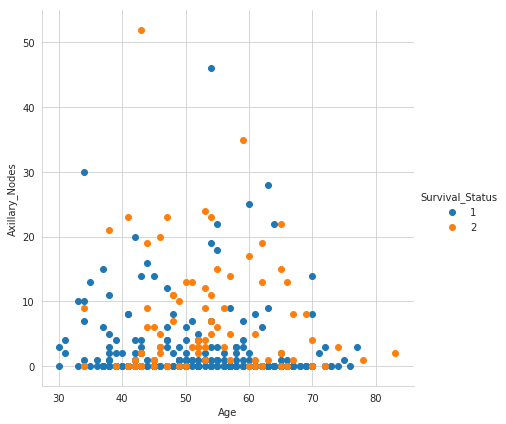

In [11]:
# Scatter plot for Age against Axillary nodes
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=6) \
   .map(plt.scatter, "Age", "Axillary_Nodes") \
   .add_legend();
plt.show();

**Observation(s):**
    Data points are random scattered, so we cannot draw any conclusion from above plots.
    

### Pair Plots    
   - A “Pair plots” is also known as a scatterplot, in which one variable in the same data row is matched
      with another variable’s value.     
   - Pair plots are just elaborations on showing all variables paired with all the other variables.     
   - It  is used to visualize the relationship between two variables. 
   - We can detect outliers with the help of pair plots.
   - It results best optimisation of data sets by analysing given different pairs.
   - A scatter plot is more poweful when we incorporate categorical data as an additional dimension.
   - Effective for less than 5 or 6 fetaures(columns).
   - Since we have less number of features we can analyse them with pair plots.
    

In [13]:
# pairwise scatter plot: Pair-Plot
# plt.close();
# sns.set_style("whitegrid");
# sns.pairplot(haberman, hue="Survival_Status", size=3);
# plt.show()

# NOTE: the diagnol elements are PDFs for each feature.

'LinAlgError' is getting raised when trying to do a KDE on a single observation. we could use a histogram on the diagonal, instead of a kde, which will probably be more robust.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


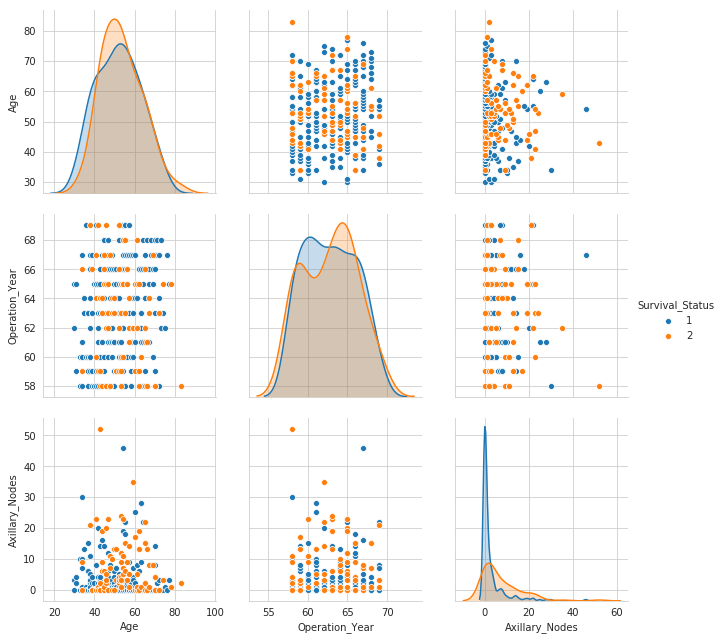

In [15]:
# Plotting pairplot for Class variable 'Sirvival status' with "Age", "Year of operation", "axillary nodes" as x and y axises
plt.close()
sns.pairplot(haberman, hue="Survival_Status", vars=["Age", "Operation_Year", "Axillary_Nodes"], size=3)
plt.show()

** Observation(s): **
None of the above pair plots are useful to draw any conclusion out of it.

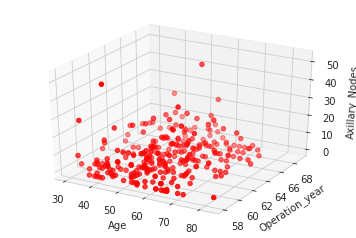

In [16]:
#3D scattered plot "Age", "Year of operation", "axillary nodes", "Survival status"
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

x=haberman["Age"]
y=haberman["Operation_Year"]
z=haberman["Axillary_Nodes"]

ax.scatter(x,y,z,marker='o', c='r');

ax.set_xlabel('Age')
ax.set_ylabel('Operation_year')
ax.set_zlabel('Axillary_Nodes')

plt.show()

## Univariate Analysis:

#### Histogram

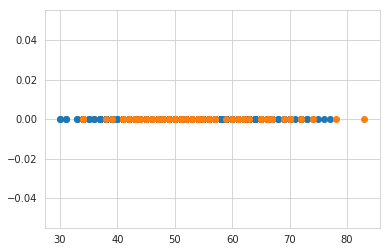

In [23]:
#showing datasets using HISTOGRAM
import numpy as np
Survived = haberman.loc[haberman["Survival_Status"] == 1];
Non_Survived = haberman.loc[haberman["Survival_Status"] == 2];

plt.plot(Survived["Age"], np.zeros_like(Survived['Age']), 'o')
plt.plot(Non_Survived["Age"], np.zeros_like(Non_Survived['Age']), 'o')


plt.show()

Disadvantages of 1-D scatter plot: Very hard to make sense as points are overlapping a lot.

In [24]:
# Perform univariate analysis 
def plotFeature(feature_var, class_var):
    sns.set_style(style="whitegrid")
    sns.FacetGrid(data=haberman, hue=class_var, size=5) \
    .map(sns.distplot, feature_var) \
    .add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


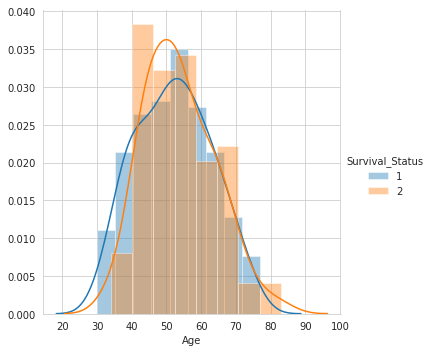

In [25]:
plotFeature("Age", "Survival_Status")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


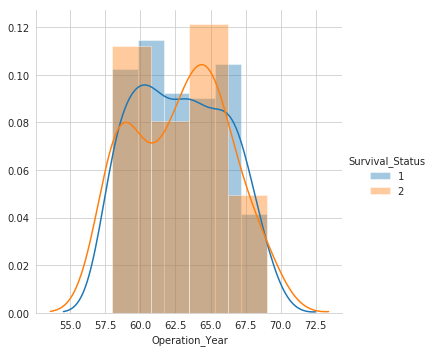

In [26]:
plotFeature("Operation_Year", "Survival_Status")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


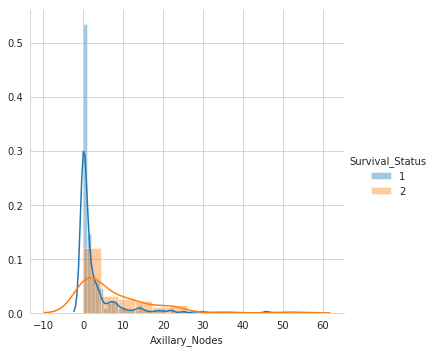

In [27]:
plotFeature("Axillary_Nodes", "Survival_Status")
plt.show()

** Observation(s): **
- From above three graph, it is very clear 'Axil_nodes' gives far better infotmation than 'Age_of_Patient',
- we can see most Survival patients fall into Zero Auxillary nodes. 
- where as (Age) and (Year of operation) are not good features as their distribution looks very similar.
    
    therefore axil nodes > Age of patient > Operation year

### CDF

[0.43381211 0.08152174 0.02911491 0.01746894 0.01455745 0.02038043
 0.00582298 0.00582298 0.00291149 0.01164596 0.00291149 0.00291149
 0.00291149 0.00291149 0.00582298 0.         0.00291149 0.
 0.00291149 0.00291149 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00291149]
[ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.46666667
 46.        ]
[0.19230769 0.08547009 0.04985755 0.02136752 0.02849003 0.03561254
 0.02849003 0.02849003 0.02136752 0.00712251 0.01424501 0.00712251
 0.01424501 0.02849003 0.         0.         0.         0.
 0.         0.         0.00712251 0.         0.         0.
 0.         0.         0.         0.         0.  

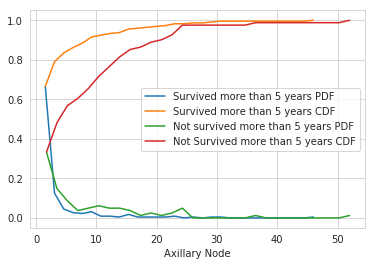

In [28]:
#Get the counts and bin edges of axillary nodes whose survival status is 1
counts, bin_edges = np.histogram(Survived["Axillary_Nodes"], bins=30, density=True)
print (counts)
print (bin_edges)

#Get the counts and bin edges of axillary nodes whose survival status is 2
counts_Non, bin_edges_Non = np.histogram(Non_Survived["Axillary_Nodes"], bins=30, density=True)
print (counts_Non)
print (bin_edges_Non)

#PDF and CDF of survived
pdf_axillary_survived = counts/sum(counts)
cdf_axillary_survived = np.cumsum(pdf_axillary_survived)

#PDFand CDF of non survived
pdf_axillary_Non_survived = counts_Non/sum(counts_Non)
cdf_axillary_Non_survived = np.cumsum(pdf_axillary_Non_survived)

# Plot survived and non survived PDF, CDF in a single plot
plt.plot(bin_edges[1:], pdf_axillary_survived)
plt.plot(bin_edges[1:], cdf_axillary_survived)
plt.plot(bin_edges_Non[1:], pdf_axillary_Non_survived)
plt.plot(bin_edges_Non[1:], cdf_axillary_Non_survived)
#plt.xticks(np.linspace(0,50,13))
plt.xlabel("Axillary Node")

plt.legend(["Survived more than 5 years PDF", "Survived more than 5 years CDF", "Not survived more than 5 years PDF", "Not Survived more than 5 years CDF" ])
plt.show()


[0.29220779 0.         0.21915584 0.         0.         0.29220779
 0.         0.         0.28003247 0.         0.19480519 0.
 0.         0.26785714 0.         0.         0.26785714 0.
 0.         0.18262987 0.         0.26785714 0.         0.
 0.25568182 0.         0.         0.12175325 0.         0.08522727]
[58.         58.36666667 58.73333333 59.1        59.46666667 59.83333333
 60.2        60.56666667 60.93333333 61.3        61.66666667 62.03333333
 62.4        62.76666667 63.13333333 63.5        63.86666667 64.23333333
 64.6        64.96666667 65.33333333 65.7        66.06666667 66.43333333
 66.8        67.16666667 67.53333333 67.9        68.26666667 68.63333333
 69.        ]
[0.4040404  0.         0.3030303  0.         0.         0.13468013
 0.         0.         0.1010101  0.         0.23569024 0.
 0.         0.26936027 0.         0.         0.26936027 0.
 0.         0.43771044 0.         0.2020202  0.         0.
 0.13468013 0.         0.         0.1010101  0.         0.1346801

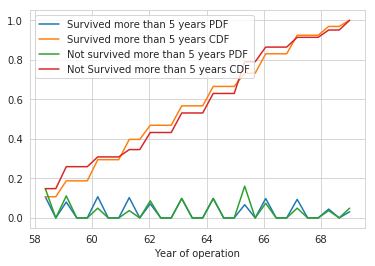

In [29]:
#Get the counts and bin edges of axillary nodes whose survival status is 1
counts, bin_edges = np.histogram(Survived["Operation_Year"], bins=30, density=True)
print (counts)
print (bin_edges)

#Get the counts and bin edges of axillary nodes whose survival status is 2
counts_Non, bin_edges_Non = np.histogram(Non_Survived["Operation_Year"], bins=30, density=True)
print (counts_Non)
print (bin_edges_Non)

#PDF and CDF of survived
pdf_axillary_survived = counts/sum(counts)
cdf_axillary_survived = np.cumsum(pdf_axillary_survived)

#PDFand CDF of non survived
pdf_axillary_Non_survived = counts_Non/sum(counts_Non)
cdf_axillary_Non_survived = np.cumsum(pdf_axillary_Non_survived)

# Plot survived and non survived PDF, CDF in a single plot
plt.plot(bin_edges[1:], pdf_axillary_survived)
plt.plot(bin_edges[1:], cdf_axillary_survived)
plt.plot(bin_edges_Non[1:], pdf_axillary_Non_survived)
plt.plot(bin_edges_Non[1:], cdf_axillary_Non_survived)
#plt.xticks(np.linspace(0,50,13))
plt.xlabel("Year of operation")

plt.legend(["Survived more than 5 years PDF", "Survived more than 5 years CDF", "Not survived more than 5 years PDF", "Not Survived more than 5 years CDF" ])
plt.show()

** Observation(s) **
 - patient having positive axillary Node less than (~46) survived more than 5 years otherwise not survived.

### Data statistics: Mean, Variance and Std-dev

In [38]:
#Mean with an outlier.
print(np.mean(np.append(Survived["Axillary_Nodes"],550)));

print(np.mean(Survived["Axillary_Nodes"]))
print(np.mean(Non_Survived["Axillary_Nodes"]))

print("\nStd-dev:");
print(np.std(Survived["Axillary_Nodes"]))
print(np.std(Non_Survived["Axillary_Nodes"]))


5.231111111111111
2.799107142857143
7.45679012345679

Std-dev:
5.869092706952764
9.128776076761635


** Observation(s) **
 - Mean of positive axillary nodes for patient who survived more than 5 years after their treatment is greater that who are not.

### Median, Percentile, Quantile, IQR, MAD

In [30]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(Survived["Axillary_Nodes"]))
#Median with an outlier
print(np.median(np.append(Survived["Axillary_Nodes"],550)));
print(np.median(Non_Survived["Axillary_Nodes"]))


print("\nQuantiles:")
print(np.percentile(Survived["Axillary_Nodes"],np.arange(0, 100, 25)))
print(np.percentile(Non_Survived["Axillary_Nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(Survived["Axillary_Nodes"],90))
print(np.percentile(Non_Survived["Axillary_Nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Survived["Axillary_Nodes"]))
print(robust.mad(Non_Survived["Axillary_Nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


** Observation(s): **
- Even after intruducing an outlier median of feature does not change.

### Box Plot

No handles with labels found to put in legend.


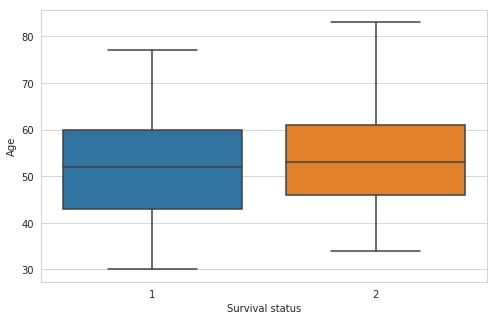

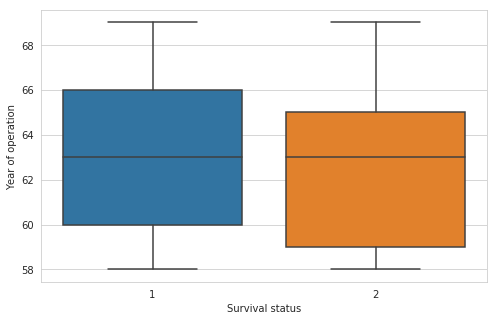

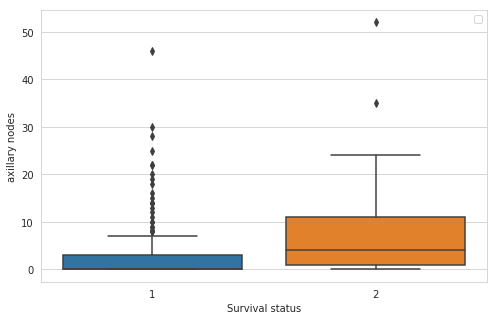

In [42]:
#Box Plots w.r.t Age_Of_Patient
plt.figure(figsize=(8,5))
sns.boxplot(x='Survival_Status',y="Age",data=haberman)


#Box Plots w.r.t Operation_Year
plt.figure(figsize=(8,5))
sns.boxplot(x='Survival_Status',y="Operation_Year",data=haberman)

#Box Plots w.r.t Axil_nodes
plt.figure(figsize=(8,5))
sns.boxplot(x='Survival_Status',y="Axillary_Nodes",data=haberman)
plt.legend()
plt.show()

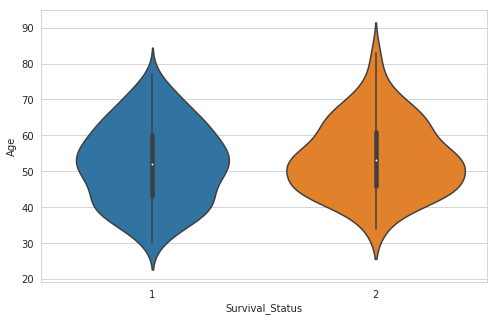

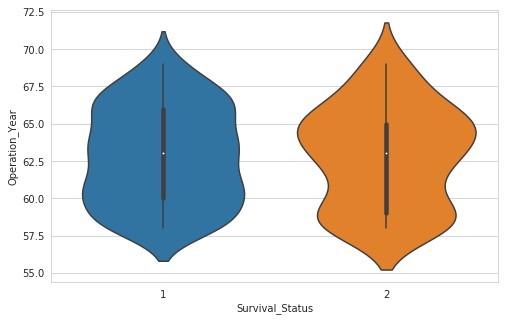

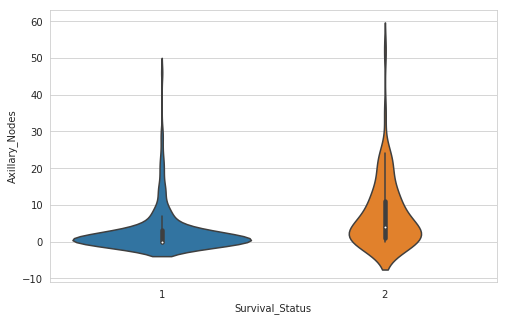

In [31]:
#Violin plots w.r.t Age_Of_Patient
plt.figure(figsize=(8,5))
sns.violinplot(x='Survival_Status',y="Age",data=haberman)

#Violin plots w.r.t Operation_Year
plt.figure(figsize=(8,5))
sns.violinplot(x='Survival_Status',y="Operation_Year",data=haberman)

#Violin plots w.r.t Axil_nodes
plt.figure(figsize=(8,5))
sns.violinplot(x='Survival_Status',y="Axillary_Nodes",data=haberman)
plt.show()

** Observation(s):**
As 50th percentile for asillary node is zero, from above plots we can see that patients with less number of axillary node have higher rate of survival. 

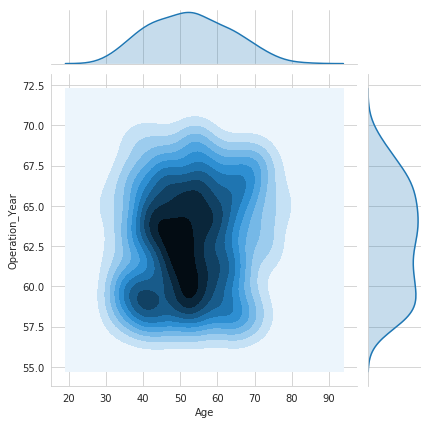

In [32]:
# Multivariate probability density
sns.jointplot(x= 'Age',kind = 'kde', y='Operation_Year', data =haberman)
plt.show()

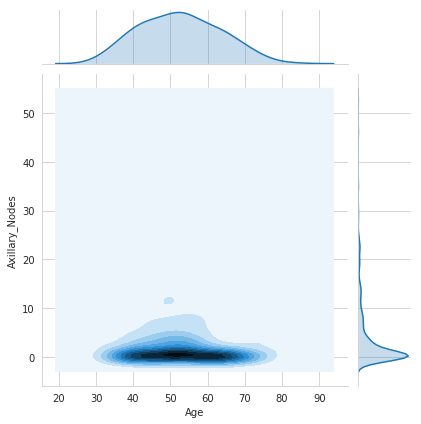

In [33]:
sns.jointplot(x= 'Age',kind = 'kde', y='Axillary_Nodes', data =haberman)
plt.show()

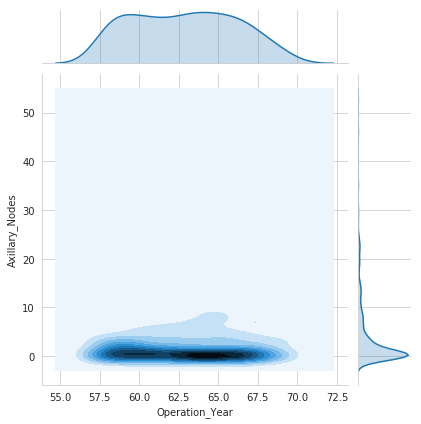

In [34]:
sns.jointplot(x= 'Operation_Year',kind = 'kde', y='Axillary_Nodes', data =haberman)
plt.show()

Better separation we can see when scattered the data points between age and axillary nodes.

### Conclusion: 
- Patient with 0 axillary nodes have more rate of survival.
- Patient who gone through surgery between age 45-55 in 1959-1964 can be classified as survived.